In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import PIL.Image as Image
from sklearn import metrics
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls


drive  sample_data  Upgraded_modelCNN99.h5


In [4]:
img = image.load_img("/content/drive/My Drive/~1540161846~Sady Baptism Apr 2010 019.jpg")

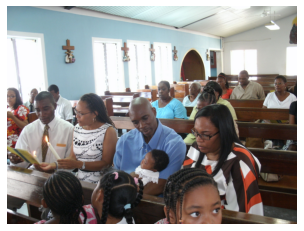

In [5]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
image_matrix = cv2.imread("/content/drive/My Drive/~1540161846~Sady Baptism Apr 2010 019.jpg")
image_matrix

array([[[148, 132, 103],
        [148, 132, 103],
        [148, 132, 103],
        ...,
        [149, 156, 149],
        [147, 154, 147],
        [146, 153, 146]],

       [[148, 132, 103],
        [148, 132, 103],
        [148, 132, 103],
        ...,
        [149, 156, 149],
        [147, 154, 147],
        [146, 153, 146]],

       [[149, 133, 104],
        [149, 133, 104],
        [149, 133, 104],
        ...,
        [148, 155, 148],
        [147, 154, 147],
        [146, 153, 146]],

       ...,

       [[ 13,  13,  27],
        [ 12,  12,  26],
        [ 11,  11,  25],
        ...,
        [ 37,  48,  70],
        [ 40,  49,  69],
        [ 41,  50,  70]],

       [[ 13,  13,  27],
        [ 12,  12,  26],
        [ 11,  11,  25],
        ...,
        [ 39,  48,  68],
        [ 40,  50,  68],
        [ 42,  52,  70]],

       [[ 16,  13,  28],
        [ 14,  11,  26],
        [ 12,   9,  24],
        ...,
        [ 39,  48,  68],
        [ 41,  51,  68],
        [ 42,  52,  69]]

In [7]:
image_matrix.shape

(2736, 3648, 3)

In [8]:
# The image labels
image_labels = ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']

In [9]:
# Initialize ImageDataGennerator
train = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)

In [10]:
target_size = (128, 128)

**Training Data**

In [11]:
# Training data
train_dataset = train.flow_from_directory("/content/drive/My Drive/architectural_elements/Train",
                                          target_size = target_size,
                                          batch_size = 200,
                                          color_mode = 'rgb',
                                          class_mode = 'categorical')

Found 7084 images belonging to 10 classes.


In [12]:
type(train_dataset)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [13]:
for imageData, labelData in train_dataset:
  print(imageData.shape)
  print(labelData.shape)
  break

(200, 128, 128, 3)
(200, 10)


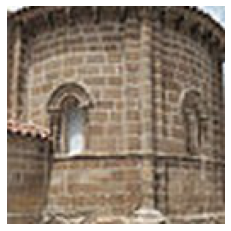

Original: apse


In [14]:
#type(imageData)
#type(labelData)
img_index = 21
plt.imshow(imageData[img_index])
plt.axis('off')
plt.show()
print(f'Original: {image_labels[np.argmax(labelData[img_index])]}')

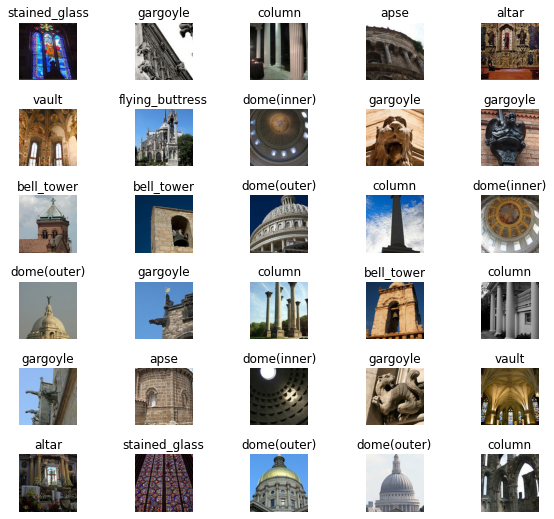

In [15]:
plt.figure(figsize = (10, 9))
plt.subplots_adjust(hspace = 0.5)
for i in range(30):
  plt.subplot(6, 5, i + 1)
  plt.imshow(imageData[i])
  plt.title(image_labels[np.argmax(labelData[i])])
  plt.axis('off')

**Validation Data**

In [16]:
# Validation data
validation_dataset = validation.flow_from_directory("/content/drive/My Drive/architectural_elements/Validate",
                                          target_size = target_size,
                                          batch_size = 200,
                                          color_mode = 'rgb',
                                          class_mode = 'categorical')

Found 2237 images belonging to 10 classes.


**Testing Data**

In [17]:
# Test data
test_dataset = test.flow_from_directory("/content/drive/My Drive/architectural_elements/Test",
                                          target_size = target_size,
                                          batch_size = 200,
                                          color_mode = 'rgb',
                                          class_mode = 'categorical')

Found 914 images belonging to 10 classes.


In [18]:
the_classes = train_dataset.class_indices
the_classes

{'altar': 0,
 'apse': 1,
 'bell_tower': 2,
 'column': 3,
 'dome(inner)': 4,
 'dome(outer)': 5,
 'flying_buttress': 6,
 'gargoyle': 7,
 'stained_glass': 8,
 'vault': 9}

In [19]:
# Number of classes
class_count = len(the_classes)
print(f"number of classes: {class_count}")

number of classes: 10


In [20]:
the_labels = sorted(the_classes.keys())
print(the_labels)

['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']


In [21]:
train_dataset.num_classes

10

In [22]:
the_labels[5]

'dome(outer)'

In [23]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, Input, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# # Build the model
# modelCNN = Sequential(
#     [
#      Conv2D(32,(3,3),activation = 'relu', input_shape=(128, 128, 3)),
#      MaxPooling2D((2,2)),
#      Conv2D(32,(3,3)),
#      MaxPooling2D((2,2)),
#      Flatten(),
#      Dense(100, activation = 'relu'),
#      Dropout(0.2),
#      Dense(50, activation = 'relu'),
#      Dropout(0.1),
#      Dense(class_count, activation = 'softmax')
#     ]
# )

In [ ]:
# # Build the model
# modelCNN = Sequential(
#     [
#      Conv2D(32,(3,3), activation = 'relu',strides=2, input_shape=(128, 128, 3)),
#      MaxPooling2D(pool_size=(2, 2), strides=2),
#      Conv2D(64,(3,3), activation = 'relu', strides=2),
#      Conv2D(128,(3,3), activation = 'relu', strides=2),
#      #GlobalAveragePooling2D(),
#      Flatten(),
#      Dense(100, activation = 'relu'),
#      Dropout(0.5),
#      Dense(1024, activation = 'relu'),
#      Dropout(0.2),
#      Dense(class_count, activation = 'softmax')
#     ]
# )

In [35]:
# Build the model
# modelCNN = Sequential(
#     [
#      Conv2D(32,(3,3), activation = 'relu', padding='same', input_shape=(128, 128, 3)),
#      BatchNormalization(),
#      Conv2D(64,(3,3), activation = 'relu', padding='same'),
#      BatchNormalization(),
#      MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'),
#      Dropout(0.2),
#      Conv2D(64,(3,3), activation = 'relu', padding='same'),
#      BatchNormalization(),
#      Conv2D(64,(3,3), activation = 'relu', padding='same'),
#      BatchNormalization(),
#      MaxPooling2D((2,2)),
#      Dropout(0.2),
#      Conv2D(128,(3,3), activation = 'relu', padding='same'),
#      BatchNormalization(),
#      Conv2D(128,(3,3), activation = 'relu', padding='same'),
#      BatchNormalization(),
#      MaxPooling2D((2,2)),
#      Dropout(0.2),
#      GlobalAveragePooling2D(),
#      Flatten(),
#      Dense(100, activation = 'relu'),
#      Dropout(0.2),
#      Dense(1024, activation = 'relu'),
#      Dropout(0.2),
#      Dense(class_count, activation = 'softmax')
#     ]
# )

In [139]:
# modelCNN = Sequential()
# modelCNN.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(128,128,3),padding='same'))
# modelCNN.add(Activation('relu'))
# modelCNN.add(MaxPooling2D(pool_size=2))

# modelCNN.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
# modelCNN.add(MaxPooling2D(pool_size=2))

# modelCNN.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
# modelCNN.add(MaxPooling2D(pool_size=2))

# modelCNN.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
# modelCNN.add(MaxPooling2D(pool_size=2))

# modelCNN.add(Dropout(0.3))
# modelCNN.add(Flatten())
# modelCNN.add(Dense(150))
# modelCNN.add(Activation('relu'))
# modelCNN.add(Dropout(0.4))
# modelCNN.add(Dense(class_count,activation = 'softmax'))

In [ ]:
# modelCNN = Sequential(
#     [
#      Conv2D(32,(3,3), activation = 'relu', input_shape=(128, 128, 3)),

#      Conv2D(64,(3,3), activation = 'relu'),
#      MaxPooling2D(pool_size=(2, 2)),

#      Dropout(0.25),

#      Flatten(),
#      Dense(128, activation = 'relu'),
#      Dropout(0.5),

#      Dense(class_count, activation = 'softmax')
#     ]
# )

In [24]:
modelCNN.summary()

NameError: ignored

In [31]:
# Compile the model
modelCNN.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Callbacks
callbacks = [
             EarlyStopping(patience = 10, mode = 'min', monitor = 'val_loss')
]

In [33]:
train_size = 7084
batch_size = 16
# steps_per_epoch = train_size//batch_size
# steps_per_epoch = 100

In [34]:
# One-Hot encode the y variable
#history = modelCNN.fit(X_train, tf.keras.utils.to_categorical(y_train), epochs = 10, validation_data = (X_test, y_test))
#history = modelCNN.fit(train_dataset, steps_per_epoch = 3, epochs = 30, validation_data = test_dataset)
history = modelCNN.fit(train_dataset, batch_size = batch_size, epochs = 100, steps_per_epoch = 3, verbose = 2, validation_data = validation_dataset, callbacks = callbacks)

Epoch 1/100


KeyboardInterrupt: ignored

In [145]:
losses = pd.DataFrame(history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.885224,0.309357,1.526904,0.436746
1,1.440546,0.492362,1.265991,0.543585
2,1.277559,0.558402,1.193533,0.569960
3,1.126464,0.611553,1.064893,0.628520
4,1.026934,0.645469,1.031709,0.626285


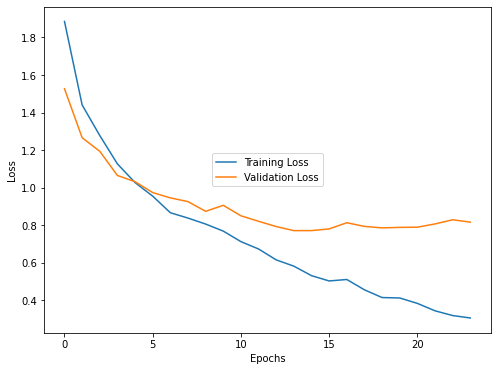

In [146]:
# Plot the loss per iteration
plt.figure(figsize=(8, 6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
losses['loss'].plot(label = 'Training Loss')
losses['val_loss'].plot(label = 'Validation Loss')
plt.legend(loc = 'center')

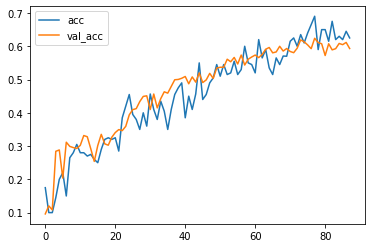

In [ ]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Labels of the Training Dataset
labels = (train_dataset.class_indices)
labels = dict((value, key) for key, value in labels.items())
labels

{0: 'altar',
 1: 'apse',
 2: 'bell_tower',
 3: 'column',
 4: 'dome(inner)',
 5: 'dome(outer)',
 6: 'flying_buttress',
 7: 'gargoyle',
 8: 'stained_glass',
 9: 'vault'}

In [25]:
from tensorflow.keras.preprocessing import image
def classify_image(img_path, model, labels):
  # Load image
  img = image.load_img(img_path, target_size = (128, 128))
  # Print image
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  # Convert image to numpy array
  img_np = image.img_to_array(img)
  img_np = np.expand_dims(img_np, axis = 0)
  # Make prediction
  prediction = model.predict(img_np)
  prediction_class = np.argmax(prediction[0], axis = -1)

  print(f'Prediction: {labels[prediction_class]}')

In [29]:
img_path = '/content/drive/My Drive/architectural_elements/Train/altar/126334279_d1866b5046_m.jpg'
img = image.load_img(img_path, target_size = (128, 128))
img_np = image.img_to_array(img)
img_np = np.expand_dims(img_np, axis = 0)
prediction = modelCNN.predict(img_np)
prediction_class = np.argmax(prediction[0], axis = -1)
labels[prediction_class]

NameError: ignored

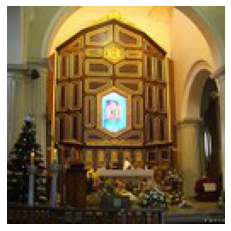

Prediction: altar


In [ ]:
classify_image(img_path)

In [ ]:
labels[prediction_class]

'apse'

**Save Model**

In [ ]:
#Save the model
modelCNN.save('model.h5')

In [24]:
saved_model = load_model('/content/drive/My Drive/model.h5')

In [25]:
saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               31490176  
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)              

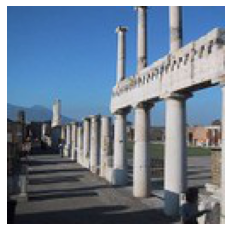

Prediction: column


In [31]:
the_path = '/content/drive/My Drive/architectural_elements/Train/column/10458275_450dd55da1_m.jpg'
classify_image(the_path, saved_model, image_labels)

# **Transfer Learning**
[MobileNet V2](https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4)
The module contains a trained instance of the network, packaged to get feature vectors from images.

In [36]:
# MobileNet without the full connected layers. We are using TensorFlow Hub.
MobileNet_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

# Input image size has to be 224x224 pixels
image_shape = (224, 224)

In [37]:
# Training data with image size 224 x 224.
train_dataset_TL = train.flow_from_directory("/content/drive/My Drive/architectural_elements/Train",
                                          target_size = image_shape,
                                          batch_size = 100,
                                          color_mode = 'rgb',
                                          class_mode = 'categorical')

Found 7084 images belonging to 10 classes.


In [38]:
for trainingImage, trainingData in train_dataset_TL:
  print(trainingImage.shape)
  print(trainingData.shape)
  break

(100, 224, 224, 3)
(100, 10)


In [39]:
# Validation data with image size 224 x 224.
validation_dataset_TL = validation.flow_from_directory("/content/drive/My Drive/architectural_elements/Validate",
                                          target_size = image_shape,
                                          batch_size = 100,
                                          color_mode = 'rgb',
                                          class_mode = 'categorical')

Found 2237 images belonging to 10 classes.


In [40]:
# Test data with image size 224 x 224.
test_dataset_TL = test.flow_from_directory("/content/drive/My Drive/architectural_elements/Test",
                                          target_size = image_shape,
                                          batch_size = 100,
                                          color_mode = 'rgb',
                                          shuffle = True,
                                          class_mode = 'categorical')

Found 914 images belonging to 10 classes.


In [41]:
# Setup the pretrained model.
MobileNet_model = hub.KerasLayer(MobileNet_url, input_shape = image_shape+(3,))
# Fix the parameters on the pretrained model.
MobileNet_model.trainable = False

In [42]:
# The new upgraded model.
Upgraded_modelCNN = tf.keras.Sequential([
                 MobileNet_model,
                 Dense(train_dataset_TL.num_classes, activation = 'softmax')                        
])

In [43]:
# Train the new upgraded model.
Upgraded_modelCNN.compile(optimizer = 'adam',
                           loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
                           metrics = ['acc']
                           )

In [44]:
# Callbacks
new_callbacks = [
             EarlyStopping(patience = 4, mode = 'min', monitor = 'val_loss')
]

In [45]:
# Fit the new upgraded model.
#Upgraded_modelCNN.fit(train_dataset_TL, epochs = 25)
new_history = Upgraded_modelCNN.fit(train_dataset_TL,
                                    batch_size = 16,
                                    steps_per_epoch = 32,
                                    epochs = 50,
                                    verbose = 2,
                                    validation_data = validation_dataset_TL,
                                    callbacks = new_callbacks
                                    )

Epoch 1/50
32/32 - 26s - loss: 1.9761 - acc: 0.5591 - val_loss: 1.7443 - val_acc: 0.7903
Epoch 2/50
32/32 - 25s - loss: 1.6609 - acc: 0.8500 - val_loss: 1.6385 - val_acc: 0.8578
Epoch 3/50
32/32 - 24s - loss: 1.6141 - acc: 0.8737 - val_loss: 1.6210 - val_acc: 0.8650
Epoch 4/50
32/32 - 26s - loss: 1.6008 - acc: 0.8810 - val_loss: 1.6121 - val_acc: 0.8686
Epoch 5/50
32/32 - 26s - loss: 1.5957 - acc: 0.8831 - val_loss: 1.6063 - val_acc: 0.8735
Epoch 6/50
32/32 - 26s - loss: 1.5938 - acc: 0.8816 - val_loss: 1.6030 - val_acc: 0.8739
Epoch 7/50
32/32 - 26s - loss: 1.5944 - acc: 0.8810 - val_loss: 1.5997 - val_acc: 0.8753
Epoch 8/50
32/32 - 27s - loss: 1.5811 - acc: 0.8932 - val_loss: 1.5785 - val_acc: 0.9070
Epoch 9/50
32/32 - 26s - loss: 1.5583 - acc: 0.9218 - val_loss: 1.5646 - val_acc: 0.9133
Epoch 10/50
32/32 - 26s - loss: 1.5468 - acc: 0.9300 - val_loss: 1.5603 - val_acc: 0.9160
Epoch 11/50
32/32 - 25s - loss: 1.5367 - acc: 0.9384 - val_loss: 1.5573 - val_acc: 0.9160
Epoch 12/50
32/32 -

In [53]:
#Save the model
Upgraded_modelCNN.save('modelOct19.h5')

In [88]:
# Read the model
my_reloaded_model = load_model(('/content/modelOct19.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

In [89]:
lossesTL = pd.DataFrame(new_history.history)
lossesTL.head()

,loss,acc,val_loss,val_acc
0,1.976079,0.559062,1.744285,0.790344
1,1.660944,0.850000,1.638496,0.857845
2,1.614064,0.873744,1.621012,0.864998
3,1.600775,0.880967,1.612103,0.868574
4,1.595680,0.883125,1.606350,0.873491


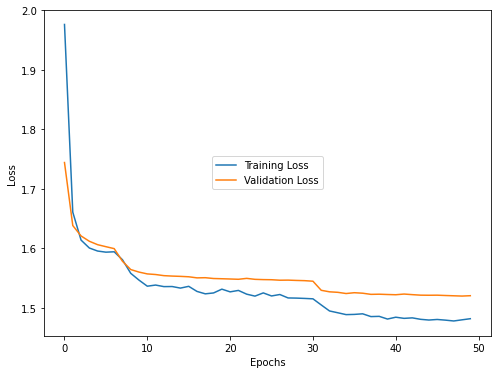

In [90]:
# Plot the loss per iteration
plt.figure(figsize=(8, 6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
lossesTL['loss'].plot(label = 'Training Loss')
lossesTL['val_loss'].plot(label = 'Validation Loss')
plt.legend(loc = 'center')

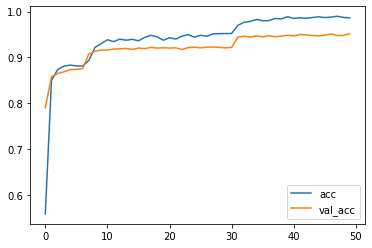

In [91]:
# Plot accuracy per iteration
plt.plot(new_history.history['acc'], label='acc')
plt.plot(new_history.history['val_acc'], label='val_acc')
plt.legend()

In [92]:
for testingImages, testingClasses in test_dataset_TL:
  print(testingImages.shape)
  print(testingClasses.shape)
  break

(100, 224, 224, 3)
(100, 10)


In [94]:
class_names = np.array(['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault'])

In [95]:
# Use the model and testing data to make predictions.
preds = Upgraded_modelCNN.predict(testingImages)
preds_ids = np.argmax(preds, axis = -1)
preds_labels = class_names[preds_ids]

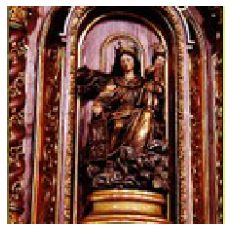

In [131]:
plt.imshow(testingImages[11])
plt.axis('off')
plt.show()

In [102]:
preds_ids[11]

0

In [128]:
class_names[preds_ids[11]]

'altar'

In [97]:
# The original labels for testing images.
testing_ids = np.argmax(testingClasses, axis = -1)
testing_labels = class_names[testing_ids]

In [101]:
testing_ids[11]

0

In [129]:
class_names[testing_ids[11]]

'altar'

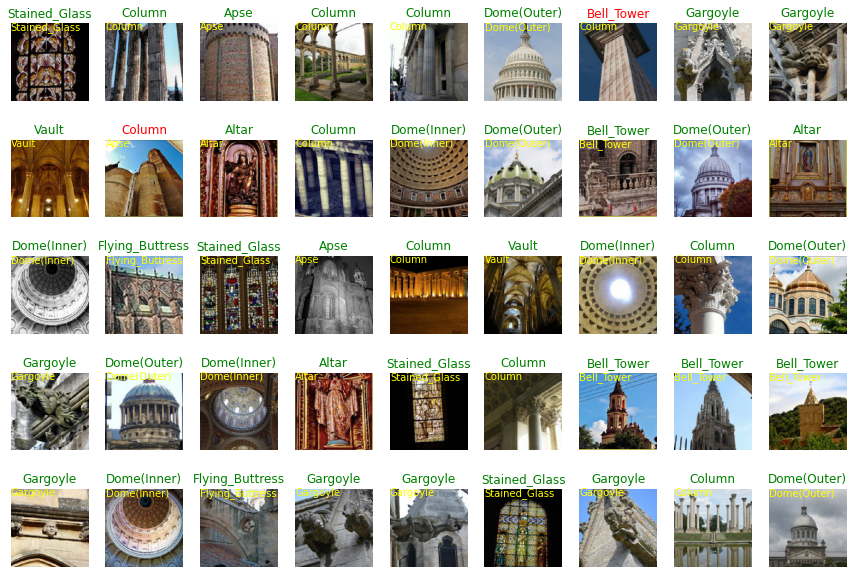

In [103]:
plt.figure(figsize = (15, 10))
plt.subplots_adjust(hspace = 0.5)
for k in range(45):
  plt.subplot(5, 9, k + 1)
  plt.imshow(testingImages[k])
  #font_dict = {'color': 'white'}
  plt.annotate(testing_labels[k].title(), (0, 20), color = 'yellow')
  color = 'green' if preds_ids[k] == testing_ids[k] else 'red'
  plt.title(preds_labels[k].title(), color = color)

  plt.axis('off')

# **For The Flask**

In [68]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import joblib
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import cv2
import os

In [198]:
label_list = ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']

In [222]:
# Our own CNN model
def classify_imageCNN(img_path, model, labels):
  # Load image
  img = image.load_img(img_path, target_size = (128, 128))
  # Print image
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  # Convert image to numpy array
  img_np = image.img_to_array(img)/255.0
  img_np = np.expand_dims(img_np, axis = 0)
  # Make prediction
  prediction = model.predict(img_np)
  prediction_class = np.argmax(prediction[0], axis = -1)

  print(f'Prediction: {labels[prediction_class]}')


In [120]:
# Model created with MobileNet
def classify_imageTL(img_path, model, labels):
  dim = (224, 224)
  # Load image
  img = image.load_img(img_path, target_size = (224, 224))
  # Print image
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  # Convert image to numpy array
  img = np.array(img)/255.0
  # Make prediction
  prediction = model.predict(img[np.newaxis,...])
  prediction_class = np.argmax(prediction[0], axis = -1)

  print(f'Prediction: {labels[prediction_class]}')

In [217]:
# Read in our CNN model
modelCNN = load_model('/content/drive/My Drive/modelCNN.h5')

In [218]:
# Read in the model with MobileNet
modelMobileNet = tf.keras.models.load_model(('/content/Upgraded_modelCNN99.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

In [219]:
# Path of selected image
the_path = '/content/drive/My Drive/architectural_elements/Test/bell_tower/8777307315_d5136269bd_n.jpg'

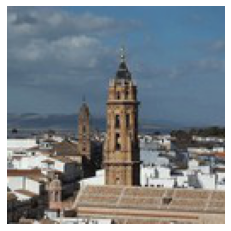

Prediction: dome(outer)


In [223]:
# Predict with our CNN model
classify_imageCNN(the_path, modelCNN, label_list)

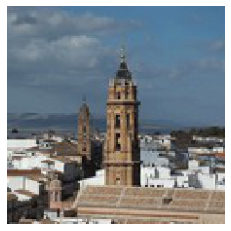

Prediction: bell_tower


In [221]:
# Predict with the adapted MobileNet model
classify_imageTL(the_path, modelMobileNet, label_list)